In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [2]:
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)
pd.options.display.max_seq_items = 1000
pd.set_option('max_colwidth',None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
match_2020 = pd.read_csv("./data_folder/2020_LoL_esports_match_data_from_OraclesElixir_20201111.csv")

In [4]:
print(f"All 2020 game match data contain {match_2020.shape[0]} rows and {match_2020.shape[1]} columns.")

All 2020 game match data contain 70080 rows and 105 columns.


In [5]:
match_2020['league'].unique()

array(['KeSPA', 'LPL', 'LFL', 'LEC', 'LCS.A', 'CBLOL', 'LCS', 'OPL',
       'VCS', 'TCL', 'TRA', 'BRCC', 'LCK', 'CK', 'LJL', 'LLA', 'LCL',
       'PCS', 'EM', 'LDL', 'OCS', 'Riot', 'MSC', 'WCS', 'NASG'],
      dtype=object)

In [6]:
# filter data
tier_one_list = ['LPL', 'LEC', 'CBLOL', 'LCS', 'OPL', 'VCS', 
    'TCL', 'LCK', 'LJL', 'LLA', 'LCL', 'PCS', 'WCS'] # 12 tier-1 leagues and 1 tournament

match_tier_one = match_2020[match_2020['league'].isin(tier_one_list)]
print(f"Tier-1 match data contain {match_tier_one.shape[0]} rows and {match_tier_one.shape[1]} columns.")
#match_tier_one.to_csv("match_tier_one.csv")
#match_tier_one.duplicated().agg('sum') # no duplicates

Tier-1 match data contain 41796 rows and 105 columns.


In [7]:
match_tier_one['league'].value_counts()

LPL      8712
LCK      5676
VCS      3660
PCS      3264
LCS      3168
LEC      2892
OPL      2604
TCL      2436
CBLOL    2352
LJL      1980
LLA      1908
WCS      1632
LCL      1512
Name: league, dtype: int64

In [8]:
match_tier_one.groupby('league')['team'].nunique()

league
CBLOL    10
LCK      12
LCL       9
LCS      10
LEC      10
LJL       8
LLA       8
LPL      17
OPL       8
PCS      13
TCL      10
VCS      11
WCS      27
Name: team, dtype: int64

In [9]:
wcs = match_tier_one[match_tier_one['league'] == 'WCS'] # get all data from the World Championship 2020

In [10]:
domestic = match_tier_one[match_tier_one['league'] != 'WCS'] 

In [11]:
# split date time strings
wcs[['date2','time']] = wcs.date.str.split(expand=True)
domestic[['date2','time']] = wcs.date.str.split(expand=True)

/opt/venv/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [12]:
# only play-in stage and stage afterwards are considered WCS in this analysis
# therefore, delete games before Sep. 25
wcs['before_play_in'] = wcs['date2'] < '2020-09-25'

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
before_play_in = wcs[wcs['date2'] < '2020-09-25'].index
wcs.drop(before_play_in, inplace=True)

/opt/venv/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
wcs['team'].unique()
#wcs.to_csv('wcs2020.csv')

array(['MAD Lions', 'INTZ', 'PSG Talon', 'Rainbow7', 'Legacy Esports',
       'LGD Gaming', 'Team Liquid', 'V3 Esports', 'SuperMassive Esports',
       'Unicorns Of Love.CIS', 'FlyQuest', 'Top Esports', 'DRX', 'Rogue',
       'DAMWON Gaming', 'JD Gaming', 'Gen.G', 'Team SoloMid', 'Fnatic',
       'Machi Esports', 'G2 Esports', 'Suning'], dtype=object)

In [15]:
# general
metrics = ['kills', 'deaths', 'assists', 'team kpm', 'ckpm', 'damagetochampions', 'dpm', 
    'dragons', 'barons', 'monsterkills', 'totalgold', 'earnedgold', 'earned gpm', 
    'total cs', 'cspm', 'wardsplaced', 'wpm', 'wardskilled', 'wcpm',
    'goldat10', 'xpat10', 'csat10', 'goldat15', 'xpat15', 'csat15']

#resource_control
diff_metrics = ['golddiffat10', 'xpdiffat10', 'csdiffat10','golddiffat15', 'xpdiffat15', 'csdiffat15']

In [16]:
wcs_by_team = wcs[wcs['position'] == 'team']
wcs_by_team.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,date2,time,before_play_in
68386,ESPORTSTMNT03/1530954,complete,http://matchhistory.na.leagueoflegends.com/en/#match-details/ESPORTSTMNT03/1530954?gameHash=40ecdfe6080da661,WCS,2020,NaN,0,2020-09-25 07:42:21,1,10.19,100,Blue,team,NaN,MAD Lions,NaN,Bard,Orianna,Volibear,Shen,Ornn,2084,1,18,14,40,18,14,1.00,0.00,0.00,0.00,1.00,nan,nan,nan,0.52,0.92,0.00,2.00,2.00,2.00,2.00,1.00,0.00,0.00,1.00,nan,0.00,0.00,1.00,1.00,1.00,1.00,2.00,0.00,1.00,9.00,2.00,0.00,1.00,1.00,0.00,73311,"2,110.68",nan,"2,662.57","1,859.02",159,4.58,57,1.64,57,300.00,8.64,65232,42597,"1,226.40",nan,"61,590.00",0.13,nan,822.00,267,182,30,31.35,"15,133.00","18,655.00",342.00,"14,214.00","17,573.00",306.00,919.00,"1,082.00",36.00,"23,855.00","29,612.00",531.00,"22,043.00","27,365.00",473.00,"1,812.00","2,247.00",58.00,2020-09-25,07:42:21,False
68387,ESPORTSTMNT03/1530954,complete,http://matchhistory.na.leagueoflegends.com/en/#match-details/ESPORTSTMNT03/1530954?gameHash=40ecdfe6080da661,WCS,2020,NaN,0,2020-09-25 07:42:21,1,10.19,200,Red,team,NaN,INTZ,NaN,Lillia,Caitlyn,Akali,Thresh,Syndra,2084,0,14,18,35,14,18,2.00,1.00,0.00,0.00,0.00,nan,nan,nan,0.40,0.92,1.00,2.00,2.00,2.00,2.00,0.00,0.00,1.00,1.00,nan,0.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,0.00,2.00,9.00,1.00,0.00,0.00,1.00,58254,"1,677.18",nan,"2,757.01","2,987.91",134,3.86,68,1.96,55,279.00,8.03,54879,32244,928.33,nan,"53,885.00",-0.13,nan,817.00,216,160,4,29.74,"14,214.00","17,573.00",306.00,"15,133.00","18,655.00",342.00,-919.00,"-1,082.00",-36.00,"22,043.00","27,365.00",473.00,"23,855.00","29,612.00",531.00,"-1,812.00","-2,247.00",-58.00,2020-09-25,07:42:21,False
68398,ESPORTSTMNT03/1530963,complete,http://matchhistory.na.leagueoflegends.com/en/#match-details/ESPORTSTMNT03/1530963?gameHash=20395ea4e8e58430,WCS,2020,NaN,0,2020-09-25 08:50:59,1,10.19,100,Blue,team,NaN,PSG Talon,NaN,Shen,Twisted Fate,Nidalee,Ornn,Pantheon,1976,1,27,8,70,27,8,4.00,0.00,0.00,0.00,1.00,nan,nan,nan,0.82,1.06,0.00,3.00,1.00,3.00,1.00,1.00,0.00,0.00,2.00,nan,0.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,1.00,9.00,2.00,1.00,1.00,1.00,0.00,65302,"1,982.85",nan,"3,292.77","3,376.37",84,2.55,57,1.73,34,265.00,8.05,63492,41959,"1,274.06",nan,"57,083.00",0.06,nan,801.00,247,153,32,31.82,"16,046.00","18,293.00",305.00,"16,151.00","18,576.00",323.00,-105.00,-283.00,-18.00,"25,511.00","29,211.00",484.00,"23,949.00","28,640.00",505.00,"1,562.00",571.00,-21.00,2020-09-25,08:50:59,False
68399,ESPORTSTMNT03/1530963,complete,http://matchhistory.na.leagueoflegends.com/en/#match-details/ESPORTSTMNT03/1530963?gameHash=20395ea4e8e58430,WCS,2020,NaN,0,2020-09-25 08:50:59,1,10.19,200,Red,team,NaN,Rainbow7,NaN,Lillia,Lucian,Graves,Renekton,Olaf,1976,0,8,27,12,8,27,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,0.24,1.06,1.00,1.00,3.00,1.00,3.00,0.00,1.00,0.00,0.00,nan,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,2.00,9.00,0.00,0.00,0.00,1.00,64003,"1,943.41",nan,"2,788.66","2,877.60",104,

In [17]:
league_team_mapping = pd.read_csv("./data_folder/league_team_mapping.csv")

In [18]:
wcs_by_team = wcs_by_team.merge(league_team_mapping[['Team', 'League']], how='left', left_on='team', right_on='Team')

In [19]:
wcs_by_team = wcs_by_team.drop(['Team', 'league'], axis=1) # drop the key from the right set
wcs_by_team = wcs_by_team.rename(columns={'League':'league'})
wcs_by_team.head()

,gameid,datacompleteness,url,year,split,playoffs,date,game,patch,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,date2,time,before_play_in,league
0,ESPORTSTMNT03/1530954,complete,http://matchhistory.na.leagueoflegends.com/en/#match-details/ESPORTSTMNT03/1530954?gameHash=40ecdfe6080da661,2020,NaN,0,2020-09-25 07:42:21,1,10.19,100,Blue,team,NaN,MAD Lions,NaN,Bard,Orianna,Volibear,Shen,Ornn,2084,1,18,14,40,18,14,1.00,0.00,0.00,0.00,1.00,nan,nan,nan,0.52,0.92,0.00,2.00,2.00,2.00,2.00,1.00,0.00,0.00,1.00,nan,0.00,0.00,1.00,1.00,1.00,1.00,2.00,0.00,1.00,9.00,2.00,0.00,1.00,1.00,0.00,73311,"2,110.68",nan,"2,662.57","1,859.02",159,4.58,57,1.64,57,300.00,8.64,65232,42597,"1,226.40",nan,"61,590.00",0.13,nan,822.00,267,182,30,31.35,"15,133.00","18,655.00",342.00,"14,214.00","17,573.00",306.00,919.00,"1,082.00",36.00,"23,855.00","29,612.00",531.00,"22,043.00","27,365.00",473.00,"1,812.00","2,247.00",58.00,2020-09-25,07:42:21,False,LEC
1,ESPORTSTMNT03/1530954,complete,http://matchhistory.na.leagueoflegends.com/en/#match-details/ESPORTSTMNT03/1530954?gameHash=40ecdfe6080da661,2020,NaN,0,2020-09-25 07:42:21,1,10.19,200,Red,team,NaN,INTZ,NaN,Lillia,Caitlyn,Akali,Thresh,Syndra,2084,0,14,18,35,14,18,2.00,1.00,0.00,0.00,0.00,nan,nan,nan,0.40,0.92,1.00,2.00,2.00,2.00,2.00,0.00,0.00,1.00,1.00,nan,0.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,0.00,2.00,9.00,1.00,0.00,0.00,1.00,58254,"1,677.18",nan,"2,757.01","2,987.91",134,3.86,68,1.96,55,279.00,8.03,54879,32244,928.33,nan,"53,885.00",-0.13,nan,817.00,216,160,4,29.74,"14,214.00","17,573.00",306.00,"15,133.00","18,655.00",342.00,-919.00,"-1,082.00",-36.00,"22,043.00","27,365.00",473.00,"23,855.00","29,612.00",531.00,"-1,812.00","-2,247.00",-58.00,2020-09-25,07:42:21,False,CBLOL
2,ESPORTSTMNT03/1530963,complete,http://matchhistory.na.leagueoflegends.com/en/#match-details/ESPORTSTMNT03/1530963?gameHash=20395ea4e8e58430,2020,NaN,0,2020-09-25 08:50:59,1,10.19,100,Blue,team,NaN,PSG Talon,NaN,Shen,Twisted Fate,Nidalee,Ornn,Pantheon,1976,1,27,8,70,27,8,4.00,0.00,0.00,0.00,1.00,nan,nan,nan,0.82,1.06,0.00,3.00,1.00,3.00,1.00,1.00,0.00,0.00,2.00,nan,0.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,1.00,9.00,2.00,1.00,1.00,1.00,0.00,65302,"1,982.85",nan,"3,292.77","3,376.37",84,2.55,57,1.73,34,265.00,8.05,63492,41959,"1,274.06",nan,"57,083.00",0.06,nan,801.00,247,153,32,31.82,"16,046.00","18,293.00",305.00,"16,151.00","18,576.00",323.00,-105.00,-283.00,-18.00,"25,511.00","29,211.00",484.00,"23,949.00","28,640.00",505.00,"1,562.00",571.00,-21.00,2020-09-25,08:50:59,False,PCS
3,ESPORTSTMNT03/1530963,complete,http://matchhistory.na.leagueoflegends.com/en/#match-details/ESPORTSTMNT03/1530963?gameHash=20395ea4e8e58430,2020,NaN,0,2020-09-25 08:50:59,1,10.19,200,Red,team,NaN,Rainbow7,NaN,Lillia,Lucian,Graves,Renekton,Olaf,1976,0,8,27,12,8,27,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,0.24,1.06,1.00,1.00,3.00,1.00,3.00,0.00,1.00,0.00,0.00,nan,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,2.00,9.00,0.00,0.00,0.00,1.00,64003,"1,943.41",nan,"2,788.66","2,877.60",104,3.16,30,0.91,51,19

In [20]:
# reorder columns
wcs_by_team = wcs_by_team[['gameid', 'datacompleteness', 'url', 'league', 'year', 'split', 'playoffs',
       'date', 'game', 'patch', 'playerid', 'side', 'position', 'player',
       'team', 'champion', 'ban1', 'ban2', 'ban3', 'ban4', 'ban5',
       'gamelength', 'result', 'kills', 'deaths', 'assists', 'teamkills',
       'teamdeaths', 'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'firstblood', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim',
       'team kpm', 'ckpm', 'firstdragon', 'dragons', 'opp_dragons',
       'elementaldrakes', 'opp_elementaldrakes', 'infernals', 'mountains',
       'clouds', 'oceans', 'dragons (type unknown)', 'elders', 'opp_elders',
       'firstherald', 'heralds', 'opp_heralds', 'firstbaron', 'barons',
       'opp_barons', 'firsttower', 'towers', 'opp_towers', 'firstmidtower',
       'firsttothreetowers', 'inhibitors', 'opp_inhibitors',
       'damagetochampions', 'dpm', 'damageshare', 'damagetakenperminute',
       'damagemitigatedperminute', 'wardsplaced', 'wpm', 'wardskilled', 'wcpm',
       'controlwardsbought', 'visionscore', 'vspm', 'totalgold', 'earnedgold',
       'earned gpm', 'earnedgoldshare', 'goldspent', 'gspd', 'total cs',
       'minionkills', 'monsterkills', 'monsterkillsownjungle',
       'monsterkillsenemyjungle', 'cspm', 'goldat10', 'xpat10', 'csat10',
       'opp_goldat10', 'opp_xpat10', 'opp_csat10', 'golddiffat10',
       'xpdiffat10', 'csdiffat10', 'goldat15', 'xpat15', 'csat15',
       'opp_goldat15', 'opp_xpat15', 'opp_csat15', 'golddiffat15',
       'xpdiffat15', 'csdiffat15', 'date2', 'time', 'before_play_in']]
wcs_by_team.head(5)

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,date2,time,before_play_in
0,ESPORTSTMNT03/1530954,complete,http://matchhistory.na.leagueoflegends.com/en/#match-details/ESPORTSTMNT03/1530954?gameHash=40ecdfe6080da661,LEC,2020,NaN,0,2020-09-25 07:42:21,1,10.19,100,Blue,team,NaN,MAD Lions,NaN,Bard,Orianna,Volibear,Shen,Ornn,2084,1,18,14,40,18,14,1.00,0.00,0.00,0.00,1.00,nan,nan,nan,0.52,0.92,0.00,2.00,2.00,2.00,2.00,1.00,0.00,0.00,1.00,nan,0.00,0.00,1.00,1.00,1.00,1.00,2.00,0.00,1.00,9.00,2.00,0.00,1.00,1.00,0.00,73311,"2,110.68",nan,"2,662.57","1,859.02",159,4.58,57,1.64,57,300.00,8.64,65232,42597,"1,226.40",nan,"61,590.00",0.13,nan,822.00,267,182,30,31.35,"15,133.00","18,655.00",342.00,"14,214.00","17,573.00",306.00,919.00,"1,082.00",36.00,"23,855.00","29,612.00",531.00,"22,043.00","27,365.00",473.00,"1,812.00","2,247.00",58.00,2020-09-25,07:42:21,False
1,ESPORTSTMNT03/1530954,complete,http://matchhistory.na.leagueoflegends.com/en/#match-details/ESPORTSTMNT03/1530954?gameHash=40ecdfe6080da661,CBLOL,2020,NaN,0,2020-09-25 07:42:21,1,10.19,200,Red,team,NaN,INTZ,NaN,Lillia,Caitlyn,Akali,Thresh,Syndra,2084,0,14,18,35,14,18,2.00,1.00,0.00,0.00,0.00,nan,nan,nan,0.40,0.92,1.00,2.00,2.00,2.00,2.00,0.00,0.00,1.00,1.00,nan,0.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,0.00,2.00,9.00,1.00,0.00,0.00,1.00,58254,"1,677.18",nan,"2,757.01","2,987.91",134,3.86,68,1.96,55,279.00,8.03,54879,32244,928.33,nan,"53,885.00",-0.13,nan,817.00,216,160,4,29.74,"14,214.00","17,573.00",306.00,"15,133.00","18,655.00",342.00,-919.00,"-1,082.00",-36.00,"22,043.00","27,365.00",473.00,"23,855.00","29,612.00",531.00,"-1,812.00","-2,247.00",-58.00,2020-09-25,07:42:21,False
2,ESPORTSTMNT03/1530963,complete,http://matchhistory.na.leagueoflegends.com/en/#match-details/ESPORTSTMNT03/1530963?gameHash=20395ea4e8e58430,PCS,2020,NaN,0,2020-09-25 08:50:59,1,10.19,100,Blue,team,NaN,PSG Talon,NaN,Shen,Twisted Fate,Nidalee,Ornn,Pantheon,1976,1,27,8,70,27,8,4.00,0.00,0.00,0.00,1.00,nan,nan,nan,0.82,1.06,0.00,3.00,1.00,3.00,1.00,1.00,0.00,0.00,2.00,nan,0.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,1.00,9.00,2.00,1.00,1.00,1.00,0.00,65302,"1,982.85",nan,"3,292.77","3,376.37",84,2.55,57,1.73,34,265.00,8.05,63492,41959,"1,274.06",nan,"57,083.00",0.06,nan,801.00,247,153,32,31.82,"16,046.00","18,293.00",305.00,"16,151.00","18,576.00",323.00,-105.00,-283.00,-18.00,"25,511.00","29,211.00",484.00,"23,949.00","28,640.00",505.00,"1,562.00",571.00,-21.00,2020-09-25,08:50:59,False
3,ESPORTSTMNT03/1530963,complete,http://matchhistory.na.leagueoflegends.com/en/#match-details/ESPORTSTMNT03/1530963?gameHash=20395ea4e8e58430,LLA,2020,NaN,0,2020-09-25 08:50:59,1,10.19,200,Red,team,NaN,Rainbow7,NaN,Lillia,Lucian,Graves,Renekton,Olaf,1976,0,8,27,12,8,27,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,0.24,1.06,1.00,1.00,3.00,1.00,3.00,0.00,1.00,0.00,0.00,nan,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,2.00,9.00,0.00,0.00,0.00,1.00,64003,"1,943.41",nan,"2,788.66","2,877.60",104,3.16,30,0.91,5

In [21]:
# win rate: by league
result_table = wcs_by_team.groupby(['league', 'result']).size().unstack()
result_table.columns = ['defeat', 'victory']

league_wcs_win_rate = result_table.assign(win_rate = lambda x: x.victory/x.sum(1)).sort_values(by='win_rate',ascending=False).reset_index()
league_wcs_win_rate['above_50'] = league_wcs_win_rate['win_rate'] > 0.5
league_wcs_win_rate


,league,defeat,victory,win_rate,above_50
0,LCK,12,23,0.66,True
1,LPL,24,37,0.61,True
2,LEC,22,19,0.46,False
3,LCS,13,10,0.43,False
4,LCL,8,6,0.43,False
5,TCL,7,5,0.42,False
6,PCS,10,7,0.41,False
7,OPL,5,3,0.38,False
8,LLA,5,2,0.29,False
9,CBLOL,4,1,0.20,False


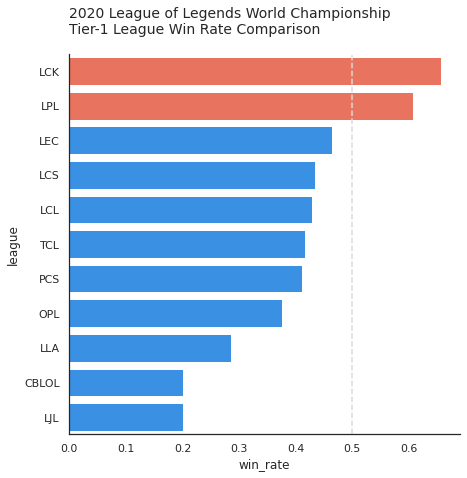

In [22]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
f, ax = plt.subplots(1, 1, figsize=(7, 7))
my_palette=['dodgerblue','tomato','lightgray']
#my_palette='mako'
bar_colors = ['dodgerblue' if (x > 0.5) else 'silver' for x in league_wcs_win_rate.win_rate]
win_rate_barplot = sns.barplot(x='win_rate',y='league',hue='above_50', dodge=False, palette=my_palette, 
    data=league_wcs_win_rate,ax=ax)
ax.axvline(x=0.5,ymax=1,color='gainsboro',linestyle='--')
ax.get_legend().remove()
ax.set_title('2020 League of Legends World Championship\nTier-1 League Win Rate Comparison', 
    loc='left',fontsize=14, pad=20)
sns.despine()
plt.savefig("win_rate.png", dpi=200)

In [23]:
league_ordered = ['LCK', 'LPL','LEC','LCS','PCS','CBLOL','LCL','LJL','LLA','OPL','TCL','VCS']

In [24]:
domestic_by_team = domestic[domestic['position'] == 'team']
domestic_mean = domestic_by_team.groupby('league')[metrics].mean()
domestic_mean = domestic_mean.reindex(league_ordered)
domestic_mean = domestic_mean.reset_index()
# domestic_mean.columns = ['league', 'kills', 'deaths', 'assists', 'damagetochampions', 'dragons', 'barons',
#        'monsterkills', 'totalgold', 'earnedgold', 'goldat10', 'goldat15',
#        'wardsplaced', 'wardskilled']


In [25]:
domestic_mean.head()

,league,kills,deaths,assists,team kpm,ckpm,damagetochampions,dpm,dragons,barons,monsterkills,totalgold,earnedgold,earned gpm,total cs,cspm,wardsplaced,wpm,wardskilled,wcpm,goldat10,xpat10,csat10,goldat15,xpat15,csat15
0,LCK,11.43,11.45,26.80,0.36,0.71,"59,716.55","1,810.34",2.36,0.58,208.67,"57,021.35","35,641.28","1,091.58",nan,32.96,122.29,3.70,58.74,1.76,"15,496.51","18,397.05",325.04,"24,413.28","29,393.01",516.68
1,LPL,13.17,13.18,31.48,0.41,0.82,"61,896.99","1,890.22",2.39,0.63,210.78,"56,828.11","35,638.12","1,101.24",nan,nan,109.80,3.36,51.94,1.58,"15,690.81","18,157.24",316.60,"24,877.69","29,069.75",505.45
2,LEC,12.71,12.74,28.74,0.39,0.77,"62,420.20","1,846.67",2.41,0.66,214.46,"58,827.63","36,946.48","1,102.96",nan,31.93,114.88,3.39,46.97,1.37,"15,368.27","18,025.30",315.16,"24,443.52","28,838.99",501.27
3,LCS,11.40,11.41,27.32,0.34,0.67,"63,646.26","1,817.33",2.52,0.69,215.61,"59,386.09","36,972.58","1,075.53",nan,32.12,113.96,3.28,50.47,1.43,"15,347.92","18,210.78",319.84,"24,181.56","29,062.20",508.98
4,PCS,12.29,12.33,29.36,0.38,0.75,"59,851.14","1,793.76",2.44,0.61,211.48,"56,894.22","35,287.53","1,068.36",nan,31.35,111.51,3.35,50.01,1.49,"15,381.89","18,144.28",314.22,"24,195.05","28,910.56",498.22


In [26]:
# median
domestic_median = domestic_by_team.groupby('league')[metrics].median()
domestic_median = domestic_median.reindex(league_ordered)
domestic_median = domestic_median.reset_index()

In [27]:
domestic_median

,league,kills,deaths,assists,team kpm,ckpm,damagetochampions,dpm,dragons,barons,monsterkills,totalgold,earnedgold,earned gpm,total cs,cspm,wardsplaced,wpm,wardskilled,wcpm,goldat10,xpat10,csat10,goldat15,xpat15,csat15
0,LCK,11.00,11.00,25.00,0.32,0.67,"57,563.50","1,784.46",2.00,0.00,205.50,"56,608.00","35,887.00","1,087.49",nan,32.90,118.00,3.63,56.00,1.73,"15,366.50","18,437.00",326.00,"24,247.00","29,367.00",518.00
1,LPL,13.00,13.00,31.00,0.40,0.80,"59,667.00","1,866.82",2.00,1.00,208.00,"56,382.00","35,797.00","1,108.96",nan,nan,106.50,3.31,50.00,1.55,"15,561.00","18,190.50",318.00,"24,678.50","29,079.00",508.00
2,LEC,12.00,12.00,27.00,0.36,0.76,"59,814.00","1,820.53",2.50,1.00,212.50,"58,096.50","36,826.50","1,108.53",nan,31.80,111.00,3.35,44.50,1.34,"15,305.50","18,067.00",315.00,"24,326.50","28,836.50",502.00
3,LCS,11.00,11.00,26.00,0.31,0.65,"59,013.00","1,802.25",3.00,1.00,213.50,"58,428.00","36,783.50","1,083.58",nan,32.12,109.00,3.24,48.00,1.41,"15,235.50","18,247.00",322.00,"24,121.50","29,108.00",508.50
4,PCS,12.00,12.00,28.00,0.36,0.74,"56,306.00","1,785.88",3.00,1.00,210.00,"57,353.50","35,815.50","1,071.74",nan,31.23,108.00,3.31,48.00,1.48,"15,303.00","18,245.50",314.00,"24,077.00","28,923.00",499.50
5,CBLOL,14.50,14.50,32.00,0.41,0.85,"62,435.00","1,956.92",3.00,1.00,199.00,"58,066.00","36,408.50","1,112.30",nan,30.77,110.00,3.37,47.00,1.43,"15,307.00","17,916.00",306.00,"24,236.50","28,369.00",484.00
6,LCL,14.00,14.00,29.00,0.41,0.90,"58,438.50","1,920.48",2.00,0.00,186.00,"54,631.50","33,592.00","1,055.19",nan,30.34,93.00,3.02,39.00,1.28,"15,130.50","17,936.50",305.00,"23,836.50","28,674.50",486.00
7,LJL,12.00,12.00,26.00,0.34,0.73,"58,101.50","1,747.78",3.00,1.00,211.50,"56,444.50","35,144.00","1,042.12",nan,30.70,113.00,3.43,51.50,1.52,"15,105.50","18,067.50",311.00,"23,637.50","28,695.00",496.00
8,LLA,10.00,10.00,23.00,0.28,0.59,"59,284.50","1,669.92",3.00,1.00,224.50,"60,397.50","37,869.50","1,056.78",nan,31.79,118.00,3.35,54.00,1.55,"15,217.00","18,315.50",318.50,"23,969.50","29,222.00",507.50
9,OPL,13.00,13.00,29.00,0.37,0.79,"56,785.50","1,831.29",2.00,0.00,205.00,"55,028.00","35,048.00","1,094.71",nan,31.10,97.00,3.08,42.00,1.30,"15,278.00","18,168.50",313.00,"24,061.50","28,769.00",496.00


In [28]:
# # Initialize the FacetGrid object
# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# pal = sns.cubehelix_palette(12, rot=-.4, light=.7)
# g = sns.FacetGrid(domestic_by_team, row="league", hue='league', aspect=15, height=.5,palette=pal, row_order=league_ordered)

def label(x, color, label):
      """The function outputs league labels on the graph"""
      ax = plt.gca()
      ax.text(0, .2, label, fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes)

def draw_single_metric_comp(metric_x, data):
      # Initialize the FacetGrid object
      sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
      pal = ['#ff6347', '#1E90FF']
      g = sns.FacetGrid(data, row="league", hue='league', aspect=4, height=1.5,palette=pal, row_order=['LCK', 'LPL'])

      g.map(sns.kdeplot, metric_x,
            bw_adjust=.5, clip_on=False,
            fill=True, alpha=0.7, linewidth=1.5,)
      g.map(sns.kdeplot, metric_x, clip_on=False, color="w", lw=2, bw_adjust=.5)
      g.map(plt.axhline, y=0, lw=2, clip_on=False)

      g.map(label, metric_x)

      # Set the subplots to overlap
      g.fig.subplots_adjust(hspace=-.25)

      # Remove axes details that don't play well with overlap
      g.set_titles("")
      g.set(yticks=[])
      g.despine(bottom=True, left=True)

# g.map(sns.kdeplot, "kills",
#       bw_adjust=.5, clip_on=False,
#       fill=True, alpha=0.7, linewidth=1.5,)
# g.map(sns.kdeplot, "kills", clip_on=False, color="w", lw=2, bw_adjust=.5)
# g.map(plt.axhline, y=0, lw=2, clip_on=False)

# g.map(label, "kills")






# # Set the subplots to overlap
# g.fig.subplots_adjust(hspace=-.25)


# # Remove axes details that don't play well with overlap
# g.set_titles("")
# g.set(yticks=[])
# g.despine(bottom=True, left=True)

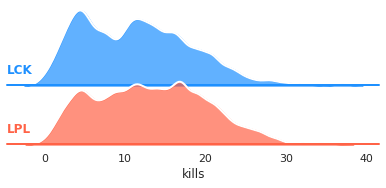

In [29]:
# extract LPL and LCK data
draw_single_metric_comp('kills', domestic_by_team.loc[(domestic_by_team['league']=='LPL')|(domestic_by_team['league']=='LCK')])
plt.savefig('kills_comp.png', dpi=200)

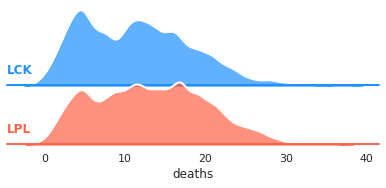

In [30]:
draw_single_metric_comp('deaths', domestic_by_team.loc[(domestic_by_team['league']=='LPL')|(domestic_by_team['league']=='LCK')])
plt.savefig('deaths_comp.png', dpi=200)

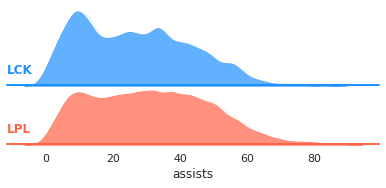

In [31]:
draw_single_metric_comp('assists', domestic_by_team.loc[(domestic_by_team['league']=='LPL')|(domestic_by_team['league']=='LCK')])
plt.savefig('assists_comp.png', dpi=200)

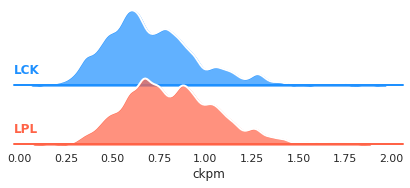

In [32]:
draw_single_metric_comp('ckpm', domestic_by_team.loc[(domestic_by_team['league']=='LPL')|(domestic_by_team['league']=='LCK')])
plt.savefig('ckpm_comp.png', dpi=200)

In [33]:
target_teams = ['DAMWON Gaming', 'Suning']

In [34]:
domestic_by_team[['date2','time']] = domestic_by_team.date.str.split(expand=True)

/opt/venv/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [35]:
target_team_domestic = domestic_by_team[domestic_by_team['team'].isin(target_teams)]
target_team_domestic.team.unique()

array(['Suning', 'DAMWON Gaming'], dtype=object)

In [36]:
# add a metrics: dragon control
target_team_domestic['dragon_control'] = (target_team_domestic['dragons'] / (target_team_domestic['dragons'] + target_team_domestic['opp_dragons'])).fillna(0)
# add a metrics: dragon control
target_team_domestic['baron_control'] = (target_team_domestic['barons'] / (target_team_domestic['barons'] + target_team_domestic['opp_barons'])).fillna(0)

#target_team_domestic.to_csv("target_team_domestic.csv")

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [37]:

target_team_metrics = target_team_domestic.groupby(['team','date2'])['ckpm', 'csat15', 'wpm', 'dragon_control', 'baron_control'].mean()
target_team_metrics = target_team_metrics.reset_index()


/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


# 

In [38]:
date_list = pd.to_datetime(target_team_metrics['date2'].to_list())
target_team_metrics['date']=date_list

In [39]:
target_team_metrics.tail(10)

,team,date2,ckpm,csat15,wpm,dragon_control,baron_control,date
64,Suning,2020-07-13,0.70,530.00,3.78,0.53,0.78,2020-07-13
65,Suning,2020-07-16,0.72,516.67,3.75,0.52,0.67,2020-07-16
66,Suning,2020-07-24,0.82,545.33,3.31,0.62,0.67,2020-07-24
67,Suning,2020-07-27,0.74,529.33,3.27,0.50,0.67,2020-07-27
68,Suning,2020-07-30,0.73,528.00,3.98,0.29,0.25,2020-07-30
69,Suning,2020-08-07,0.75,474.67,3.37,0.40,0.67,2020-08-07
70,Suning,2020-08-09,1.09,471.33,3.51,0.47,0.89,2020-08-09
71,Suning,2020-08-15,0.89,519.25,3.32,0.78,0.75,2020-08-15
72,Suning,2020-08-22,1.04,528.67,3.73,0.28,0.33,2020-08-22
73,Suning,2020-08-25,1.10,522.00,3.42,0.47,0.89,2020-08-25


/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


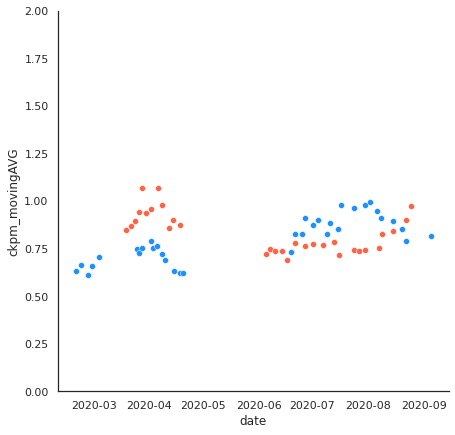

In [40]:
suning = target_team_metrics[target_team_metrics.team =='Suning']
suning['ckpm_movingAVG'] = suning.ckpm.rolling(5).mean()

dmw = target_team_metrics[target_team_metrics.team =='DAMWON Gaming']
dmw['ckpm_movingAVG'] = dmw.ckpm.rolling(5).mean()

fig, ax = plt.subplots(figsize=(7,7))
ax.set_ylim([0,2])

dmw_ckpm=sns.scatterplot(x='date', y='ckpm_movingAVG', data=dmw, color='dodgerblue', ax=ax)
#suning_ckpm.set_xticklabels(suning_ckpm.get_xticklabels(), rotation = 10)

suning_ckpm=sns.scatterplot(x='date', y='ckpm_movingAVG', data=suning, palette=my_palette, color='tomato', ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()
fig.savefig("ckpm_change.png", dpi=200)


/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


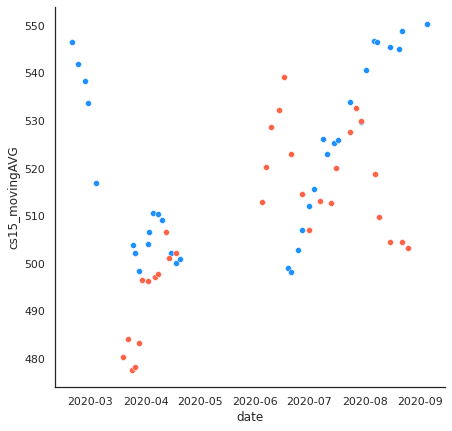

In [41]:
suning['cs15_movingAVG'] = suning.csat15.rolling(5).mean()

dmw['cs15_movingAVG'] = dmw.csat15.rolling(5).mean()

fig, ax = plt.subplots(figsize=(7,7))

dmw_ckpm=sns.scatterplot(x='date', y='cs15_movingAVG', data=dmw, color='dodgerblue', ax=ax)
#suning_ckpm.set_xticklabels(suning_ckpm.get_xticklabels(), rotation = 10)

suning_ckpm=sns.scatterplot(x='date', y='cs15_movingAVG', data=suning, color='tomato', ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()
fig.savefig("csat15_change.png", dpi=200)